<br>

# Data Exploration

` numpy ` library is imported, it is used for arrays and linear algebra.
` pandas ` Python's data manipulation and analysis library is imported.
` matplotlib.pyplot ` is used for Visualization.

`Student.csv` Dataset source = http://roycekimmons.com/tools/generated_data/exams

<br> <br>
We print the size of our dataset and check which attributes has missing values. 


In [72]:
import numpy as np # used for arrays and linear algebra
import pandas as pd # for data processing, manipulation and analysis 
import matplotlib.pyplot as plt # for visualization

df = pd.read_csv("Students.csv")

#Gets tuple with each index and the number of corresponding elements
print("The data shape is", df.shape,"\n") 

#To see the columns' names
print("The features are", df.columns.tolist(),"\n") 

#Check missing value in data frame
print(df.isnull().sum(),"\n")

#To view the numerical attributes for the data
print(df.describe().round(2))

The data shape is (1000, 8) 

The features are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score'] 

gender                         9
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     6
reading score                  0
writing score                  0
dtype: int64 

       math score  reading score  writing score
count      994.00        1000.00        1000.00
mean        66.11          69.17          68.05
std         15.10          14.60          15.20
min          0.00          17.00          10.00
25%         57.00          59.00          57.75
50%         66.00          70.00          69.00
75%         77.00          79.00          79.00
max        100.00         100.00         100.00


# Data Visualization 

#### `seaborn` Python's data visualization library is imported. 

A bar plot and pie chart for attributes `gender`, `race/ethnicity` and `parental level of education` is shown next to each other to get clear picture. The bar plot shows the count and pie chart shows in percentages form.



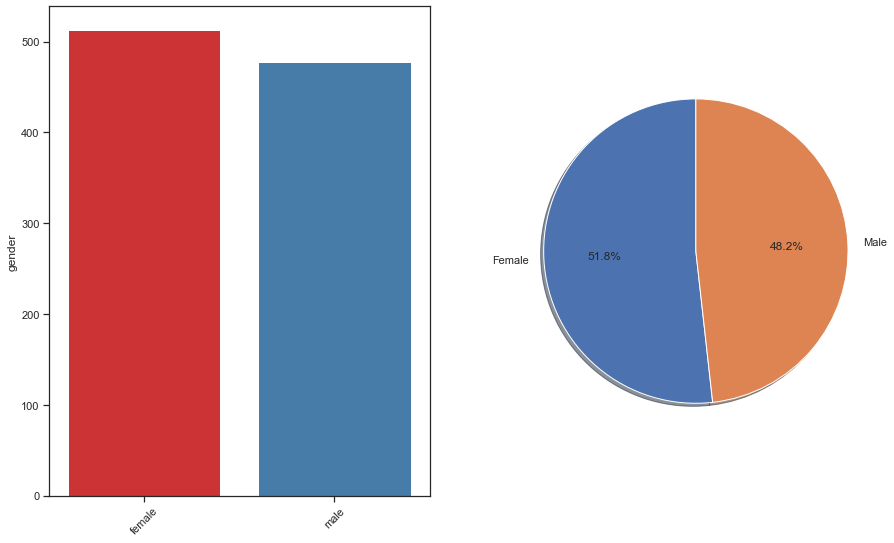

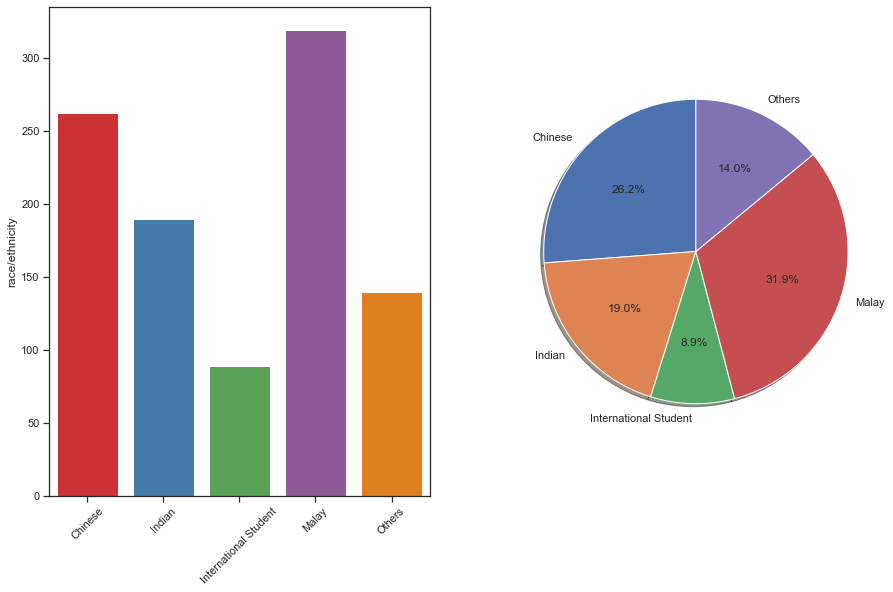

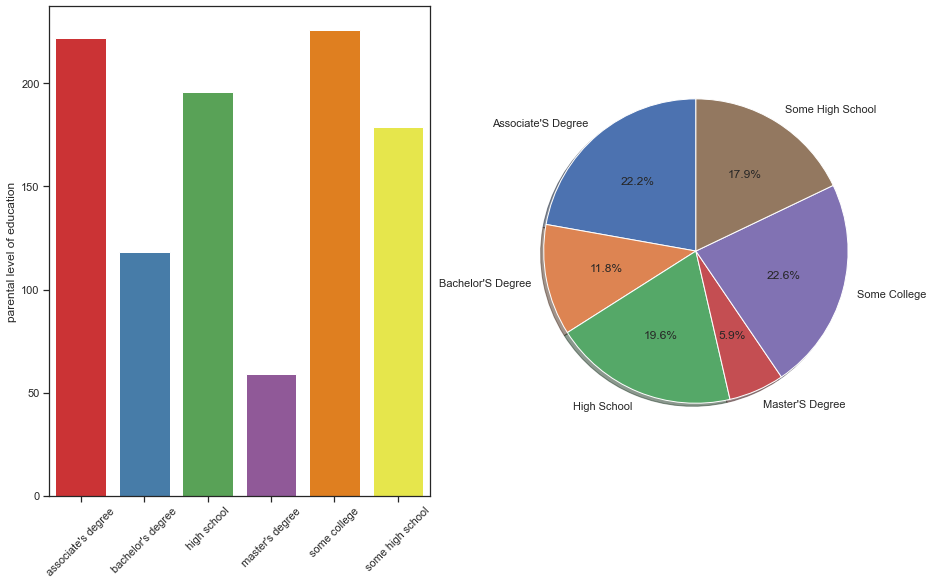

In [73]:
import seaborn as sns; #Used to plot graph to understand the data.

for attribute in ['gender', 'race/ethnicity', 'parental level of education']: 
  f, ax = plt.subplots(1,2)
  data = df[attribute].value_counts().sort_index()
  bar = sns.barplot(x = data.index, y = data, ax = ax[0], palette="Set1",)
  for item in bar.get_xticklabels():
    item.set_rotation(45)
  ax[1].pie(data.values.tolist() , labels= [i.title() for i in data.index.tolist()], autopct='%1.1f%%',shadow=True, startangle=90);
  plt.show()

***
### Observations:

From above <b> Pie Charts </b>  we can observe that there are 51.8% Females and 48.2% males, Highest percentage of 'Race/Entnicity' is 31.9% which is Malay, parent's education for Master's Degree has the lowest percentage, most of the parents educations is up to 'some college' level means at least one completed college qualification.

***


Visualization for comparison of race/ethnicity and parental level of education

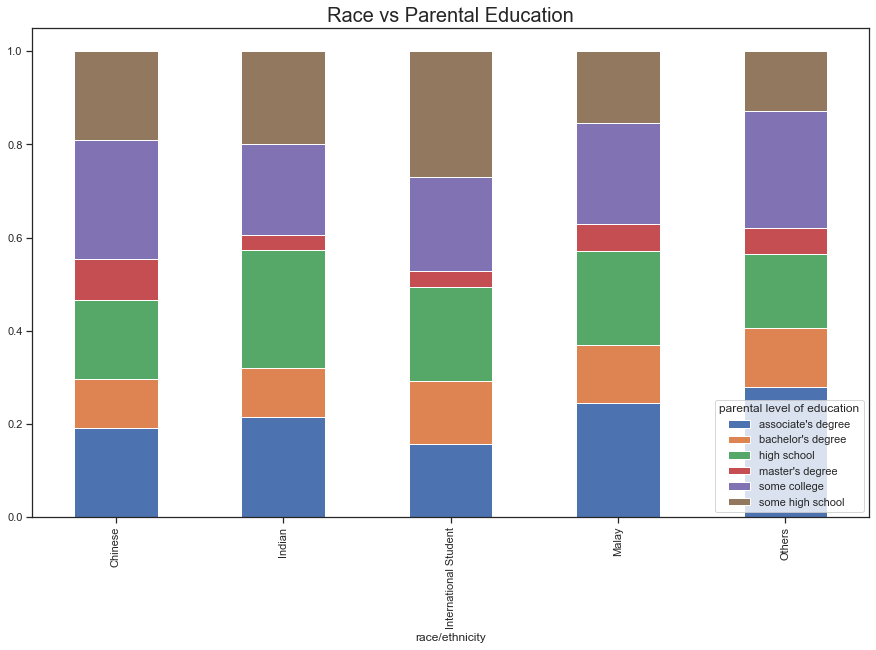

In [74]:
# comparison of race/ethnicity and parental level of education
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df['race/ethnicity'], df['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

***
### Observations: 

From above <b> Stack Bar Chart </b> we can observe Chinese Parents have the highest number of Master's Degree done. For Indian, there are hihest number of parents are High school educated. 
***

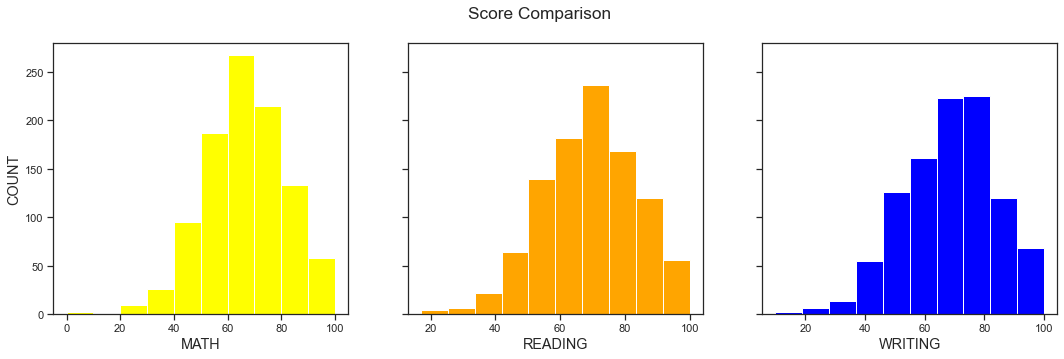

In [75]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(18,5))

#Histogram
ax1, ax2, ax3 = axes.flatten()
ax1.hist(df['math score'], bins=10, color="yellow")
ax2.hist(df['reading score'], bins=10, color="orange")
ax3.hist(df['writing score'], bins=10, color="blue")
ax1.set_xlabel('MATH', fontsize="large")
ax1.set_ylabel("COUNT", fontsize="large")
ax2.set_xlabel('READING', fontsize="large")
ax3.set_xlabel('WRITING', fontsize="large")

plt.suptitle('Score Comparison', ha='center', fontsize='x-large')
plt.show()

***
### Observations: 

From above <b>Histograms </b> we can observe the highest distributaion <b>score for Math</b> falls between 60 to 70. 
The highest distributaion <b>score for Reading</b> falls between 65 to 75 and the highest distributaion <b>score for Writing</b> falls between 62 to 82.  
***

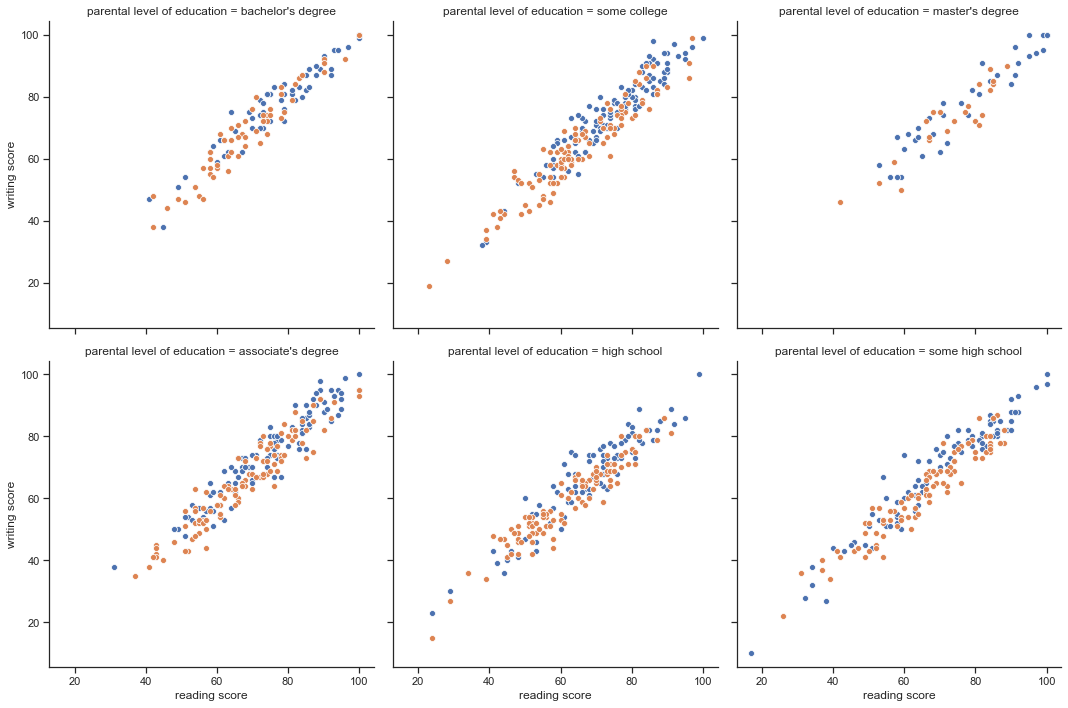

In [76]:
#Plot scatterplot between reading and writing score
cond_plot = sns.FacetGrid(data=df, col='parental level of education', hue='gender', col_wrap=3, height = 5)
cond_plot.map(sns.scatterplot, 'reading score', 'writing score' );

***
### Observations: 

From above <b>Scatterplots </b> blue dots represents Females and Orange dots represents Males. When we find the correlate <b> Reading score</b>, <b> Writing score</b> and <b> Parental level of Education</b> we can observe that for students with parents which have completed Master's Degree usually obtain score above 50%, the other's score distrubution has variations which range from 20% to 100%. 
For example, score below 40% (fail) can be seen when parental background is 'high school' , 'some high school' and 'some college'.

***

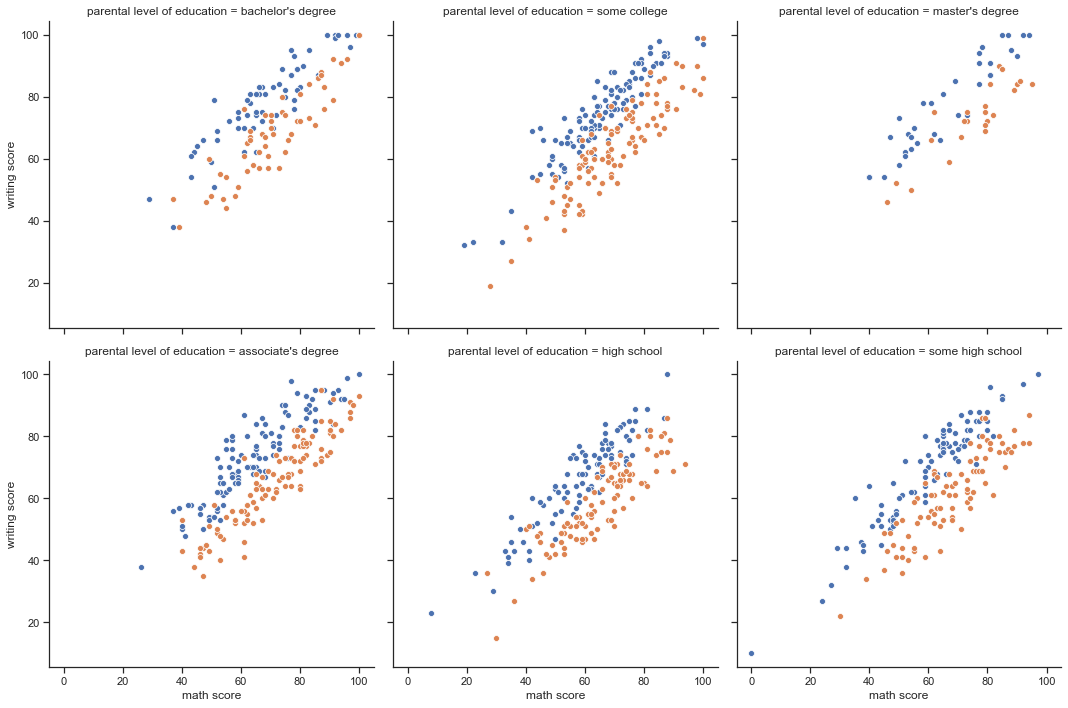

In [77]:
#Plot scatterplot between writing and math score
cond_plot = sns.FacetGrid(data=df, col='parental level of education', hue='gender', col_wrap=3, height = 5)
cond_plot.map(sns.scatterplot, 'math score', 'writing score' );

***
### Observations: 

From above <b>Scatterplots </b> blue dots represents Females and Orange dots represents Males. When we find the correlate <b> Writing score</b>, <b> Math score</b> and <b> Parental level of Education</b> we can observe that for students with parents which have completed Master's Degree and Associate's Degree usually obtain score above 40%, the other's score distrubution has variations which range from 0% to 100%. 
***

<br>
The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception).<br>
<font color='red'>'ignore'</font>: never print matching warnings.<br>
Below, the total score is calculated by summing 'Math score', 'Reading score' and 'Writing Score'.


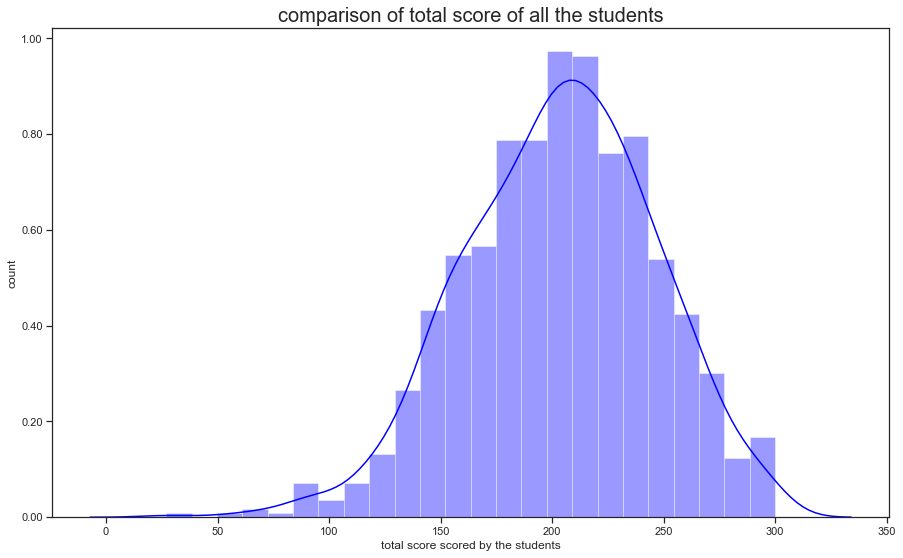

In [78]:
# computing the total score for each student
import warnings
warnings.filterwarnings('ignore')

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
ax=plt.subplot()
sns.distplot(df['total_score'], color = 'blue')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
ax.yaxis.set_ticklabels(['0.00','0.20','0.40','0.60','0.80','1.00'])
plt.show()

***
### Observations: 

From above <b>Distribution Plot </b> we can observe Total score between 195 to 220 has the highest distribution. 
<br>
It has a negatively skewed (also known as left-skewed) distribution which is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.
***

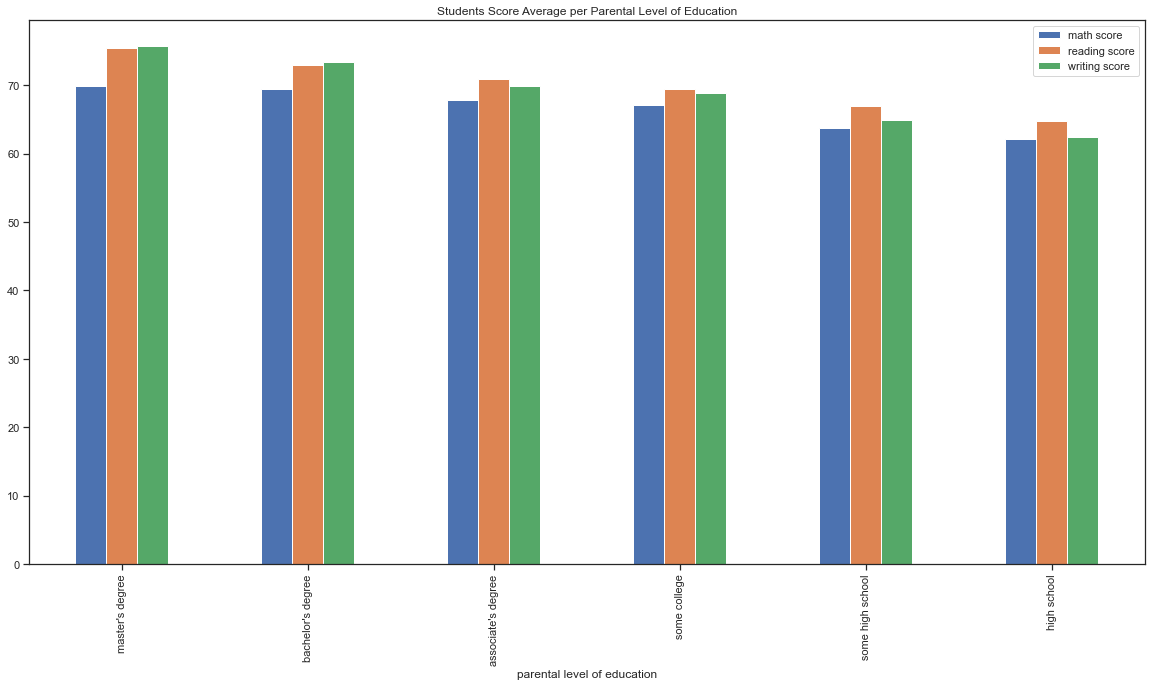

In [79]:
#Bar plot between students score and parental level of education
score_grouped = df.groupby("parental level of education", as_index=True)[["math score", "reading score", "writing score"]].mean().sort_values(by='writing score',ascending=False)
score_grouped.plot.bar(title = "Students Score Average per Parental Level of Education", figsize=(20,10))

***
### Observations: 

From above <b>Bar Plot </b> we can observe that Student's Average score coming from parental Level of education which is 'Master's Degree' are usually higher compared to other Parent's Level of Education. 
***

Next, we group the Math, Reading and Writing scores into grades : <b> A,B,C,D, E and F (Fail)</b> <br>
The <b>passsing mark</b> is set to 40. Then, we show the total number of students along with their grades. 

In [80]:
#A benchmark to evaluate passed and failed students
passmark=40

df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)
df.OverAll_PassStatus.value_counts()
df['Percentage'] = df['total_score']/3
df['Percentage']= df['Percentage'].round(1)

#A defined function to obtain students grades
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    259
C    255
A    197
D    177
E     56
F     56
Name: Grade, dtype: int64

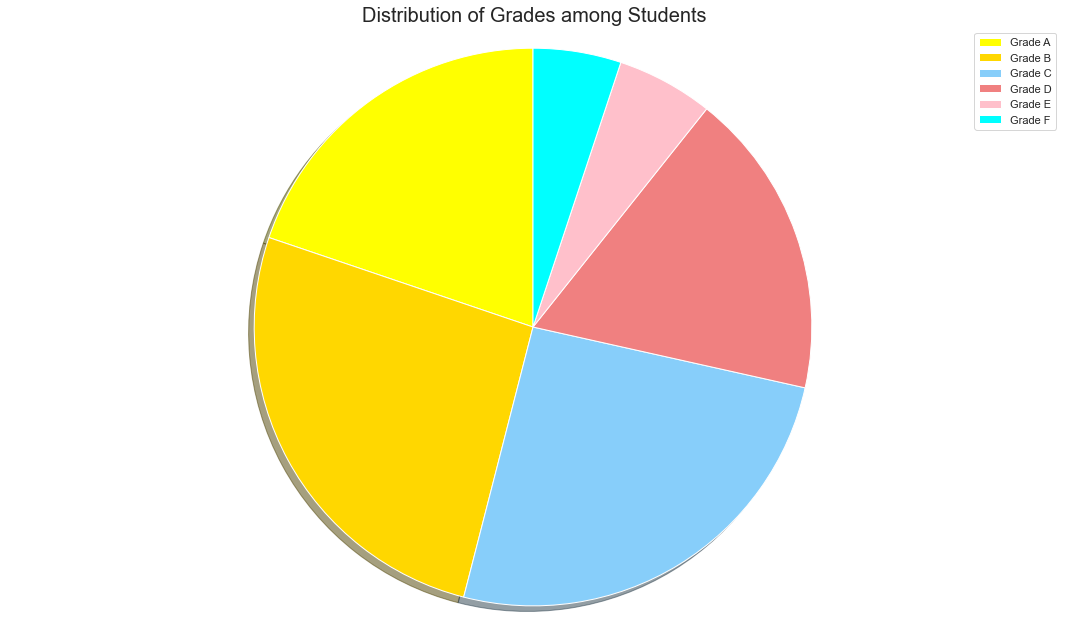

In [81]:
# plotting a pie chart for the distribution of various grades amongst the students
labels = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E', 'Grade F']
sizes = [198, 262, 255, 178, 56, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

***
### Observations: 

From above <b>Pie Chart</b> we can observe that Grade B has the largest portion followed by Grade C. Meaning, amount of students with grade B is the highest and students who get grade E and Fail is low. 
***

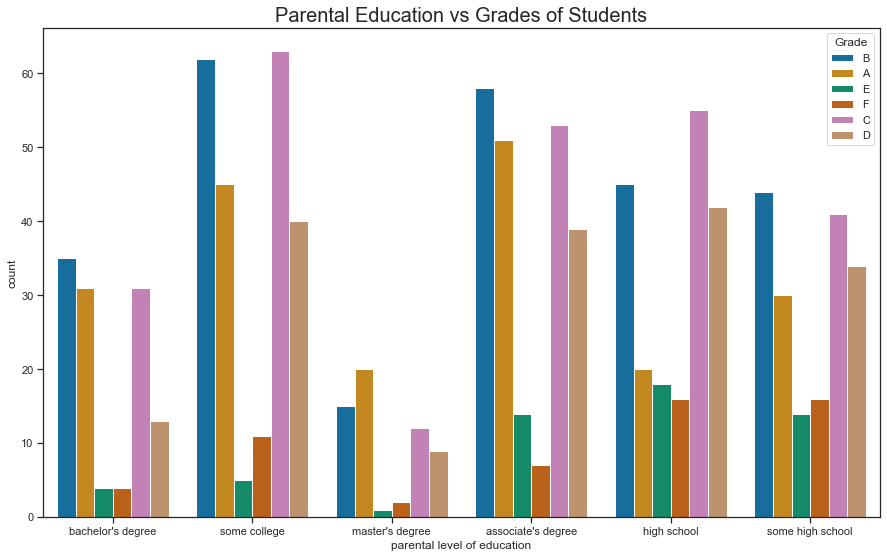

In [82]:
# for better visualization we will plot it again using seaborn
sns.countplot(x = df['parental level of education'], data = df, hue = df['Grade'], palette = 'colorblind')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

***
### Observations: 

From above <b>Bar Chart</b> we compare Parental education to Student's Grades. We can observe that for students coming from Parental Education background of <b>'Master's Degree' </b>  has the lowest number of Grade E obtained and has Zero failure rate. Furthermore, the number of students with grade A outbeats Grade B students. <br> Where else for <b> 'High School' and 'Some High School' </b> Grade E and Failure rate is quite high.
***

Now, the Average score is used to classify whether the student is considered to be a `Scholar` or `Non-Scholar`.

'average score' >70 are considered to be a `Scholar`

In [83]:
#To determine elite and non elite students
df['Scholar/Non-Scholar']=np.where(df['Percentage']>70,1,0)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Percentage,Grade,Scholar/Non-Scholar
0,female,Indian,bachelor's degree,standard,none,72.0,72,74,218.0,P,P,P,P,72.7,B,1
1,female,Malay,some college,standard,completed,69.0,90,88,247.0,P,P,P,P,82.3,A,1
2,female,Indian,master's degree,standard,none,90.0,95,93,278.0,P,P,P,P,92.7,A,1
3,male,International Student,associate's degree,free/reduced,none,47.0,57,44,148.0,P,P,P,P,49.3,E,0
4,male,Malay,some college,standard,none,76.0,78,75,229.0,P,P,P,P,76.3,B,1


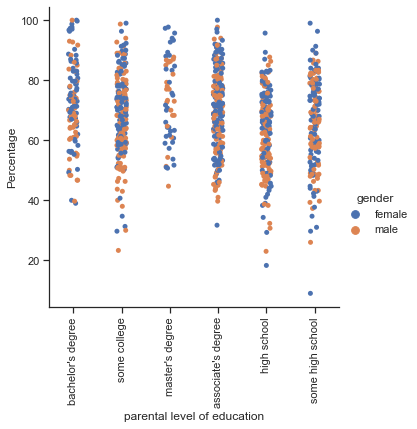

In [84]:
#Plot a categorical plot between Percentage and Parental level of education
sns.set(style="ticks")
g = sns.catplot(data=df, x="parental level of education", y="Percentage", hue="gender")
g.set_xticklabels(rotation=90)
plt.show()

***
### Observations: 

From above <b>Categorical Plot</b> we compare Parental education to students' Percentage. We can observe that for students coming from Parental Education background of <b>'Master's Degree' </b>  has no average score below 40.
***

A <b> Heatmap </b> is used to give users a better understanding of the correlations based on the colours of each tile.

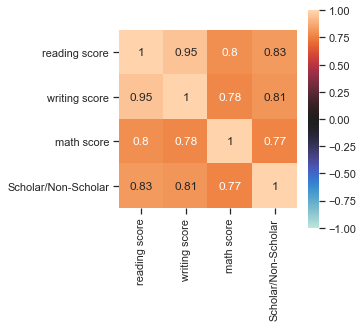

In [85]:
#A heatmap for correlations
fig, ax = plt.subplots(figsize=(4,4))
col=['reading score','writing score', 'math score', 'Scholar/Non-Scholar']
corr_matrix=df[col].corr(method="spearman")
ax=sns.heatmap(corr_matrix, center=0, vmax=1, vmin=-1, annot=True, square=True)

# Preprocessing
#### Handling Missing Value

The <b> 6 Missing values </b> in 'Math Score', 'total_score' and 'Percentage' attribute will be handled by filling it with its mean value. 

In [86]:
#Missing value is filled with their mean value.

df['math score']=df['math score'].fillna(df['math score'].mean())
df['total_score']=df['total_score'].fillna(df['total_score'].mean())
df['Percentage']=df['Percentage'].fillna(df['Percentage'].mean())
df.isnull().sum()

gender                         9
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total_score                    0
Math_PassStatus                0
Reading_PassStatus             0
Writing_PassStatus             0
OverAll_PassStatus             0
Percentage                     0
Grade                          0
Scholar/Non-Scholar            0
dtype: int64

#### Drop Rows

In [87]:
#Non-numerical missing values rows are dropped

df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       991 non-null    object 
 1   race/ethnicity               991 non-null    object 
 2   parental level of education  991 non-null    object 
 3   lunch                        991 non-null    object 
 4   test preparation course      991 non-null    object 
 5   math score                   991 non-null    float64
 6   reading score                991 non-null    int64  
 7   writing score                991 non-null    int64  
 8   total_score                  991 non-null    float64
 9   Math_PassStatus              991 non-null    object 
 10  Reading_PassStatus           991 non-null    object 
 11  Writing_PassStatus           991 non-null    object 
 12  OverAll_PassStatus           991 non-null    object 
 13  Percentage          

<br> 
#### Drop Irrelevant Feature
We also dropped `Lunch` feature we find that to be irrelevant. 

In [88]:
#Unused attribute column is droped
df = df.drop(['lunch'], axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total_score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Percentage,Grade,Scholar/Non-Scholar
0,female,Indian,bachelor's degree,none,72.0,72,74,218.0,P,P,P,P,72.7,B,1
1,female,Malay,some college,completed,69.0,90,88,247.0,P,P,P,P,82.3,A,1
2,female,Indian,master's degree,none,90.0,95,93,278.0,P,P,P,P,92.7,A,1
3,male,International Student,associate's degree,none,47.0,57,44,148.0,P,P,P,P,49.3,E,0
4,male,Malay,some college,none,76.0,78,75,229.0,P,P,P,P,76.3,B,1


#### Standardize Numerical Data

<br>
<b>StandardScaler</b> , uses a strict definition of standardization to standardize data. It purely centers the data by using the following formula, where u is the mean and s is the standard deviation. <br>

`x_scaled = (x — u)/ s`

This step is to make the value be be between -1 to 1 so that the results will be more accurate.

In [89]:
from sklearn.preprocessing import StandardScaler #To standardize the numerical data

ss=StandardScaler()

df["math score"]=ss.fit_transform(df["math score"].values.reshape(-1,1))
df["reading score"]=ss.fit_transform(df["reading score"].values.reshape(-1,1))
df["writing score"]=ss.fit_transform(df["writing score"].values.reshape(-1,1))
df["total_score"]=ss.fit_transform(df["total_score"].values.reshape(-1,1))
df["Percentage"]=ss.fit_transform(df["Percentage"].values.reshape(-1,1))

df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total_score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Percentage,Grade,Scholar/Non-Scholar
0,female,Indian,bachelor's degree,none,0.391124,0.192947,0.388956,0.343615,P,P,P,P,0.346041,B,1
1,female,Malay,some college,completed,0.191341,1.427003,1.310155,1.026783,P,P,P,P,1.024498,A,1
2,female,Indian,master's degree,none,1.589823,1.769797,1.639154,1.757065,P,P,P,P,1.759493,A,1
3,male,International Student,associate's degree,none,-1.273736,-0.835434,-1.585040,-1.305410,P,P,P,P,-1.307699,E,0
4,male,Malay,some college,none,0.657502,0.604299,0.454756,0.602748,P,P,P,P,0.600462,B,1


#### Normalize Categorical Data
<br>
<b> Label Encoder</b> is used to change the catogorical features into numerical. Ex:'Race/ethnicity' and 'Parental level of education'

In [90]:
from sklearn.preprocessing import LabelEncoder #Used to normalize labels

lbl=LabelEncoder()

df["gender"]=lbl.fit_transform(df[["gender"]])
df["race/ethnicity"]=lbl.fit_transform(df[["race/ethnicity"]])
df["parental level of education"]=lbl.fit_transform(df[["parental level of education"]])
df["test preparation course"]=lbl.fit_transform(df[["test preparation course"]])
df["Math_PassStatus"]=lbl.fit_transform(df[["Math_PassStatus"]])
df["Reading_PassStatus"]=lbl.fit_transform(df[["Reading_PassStatus"]])
df["Writing_PassStatus"]=lbl.fit_transform(df[["Writing_PassStatus"]])
df["OverAll_PassStatus"]=lbl.fit_transform(df[["OverAll_PassStatus"]])
df["Grade"]=lbl.fit_transform(df[["Grade"]])

df.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,total_score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Percentage,Grade,Scholar/Non-Scholar
0,0,1,1,1,0.391124,0.192947,0.388956,0.343615,1,1,1,1,0.346041,1,1
1,0,3,4,0,0.191341,1.427003,1.310155,1.026783,1,1,1,1,1.024498,0,1
2,0,1,3,1,1.589823,1.769797,1.639154,1.757065,1,1,1,1,1.759493,0,1
3,1,2,0,1,-1.273736,-0.835434,-1.585040,-1.305410,1,1,1,1,-1.307699,4,0
4,1,3,4,1,0.657502,0.604299,0.454756,0.602748,1,1,1,1,0.600462,1,1


### Splitting The Dataset
<br>
<b> Split</b> the dataset into <font color='blue'> Train and Test Set </font> <br>
80% Train set 20% Test set

In [91]:
x=df.drop('Scholar/Non-Scholar',axis=1)
y=df['Scholar/Non-Scholar']

print ('Shape of original dataset, train:', df.shape)
print ('x: shape=', x.shape, 'type=', type(x))
print ('y: shape=', y.shape, 'type=', type(y))

Shape of original dataset, train: (991, 15)
x: shape= (991, 14) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (991,) type= <class 'pandas.core.series.Series'>


In [92]:
from sklearn.model_selection import train_test_split #Split data into training and test set

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

print ('x full set shape=', x.shape)
print ('x train shape=', x_train.shape)
print ('x test shape=', x_test.shape)
print ('y set shape=', y.shape)
print ('y train shape=', y_train.shape)
print ('y testshape=', y_test.shape)

x_train.info()
x_test.info()

x full set shape= (991, 14)
x train shape= (792, 14)
x test shape= (199, 14)
y set shape= (991,)
y train shape= (792,)
y testshape= (199,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 930 to 814
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       792 non-null    int32  
 1   race/ethnicity               792 non-null    int32  
 2   parental level of education  792 non-null    int32  
 3   test preparation course      792 non-null    int32  
 4   math score                   792 non-null    float64
 5   reading score                792 non-null    float64
 6   writing score                792 non-null    float64
 7   total_score                  792 non-null    float64
 8   Math_PassStatus              792 non-null    int32  
 9   Reading_PassStatus           792 non-null    int32  
 10  Writing_PassStatus           792 non-null    int32  


# Model Training
### Logistic Regression

In [93]:
#Logistic Regression Method
from sklearn.linear_model import  LogisticRegression

# creating a model
model_1 = LogisticRegression()

# feeding the training data to the model
model_1.fit(x_train, y_train)

# predicting the test set results
y_pred_1 = model_1.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model_1.score(x_train, y_train))
print("Testing Accuracy :", model_1.score(x_test, y_test))

Training Accuracy : 0.9886363636363636
Testing Accuracy : 0.9849246231155779


### Confusion Matrix 
For `Logistic Regression`

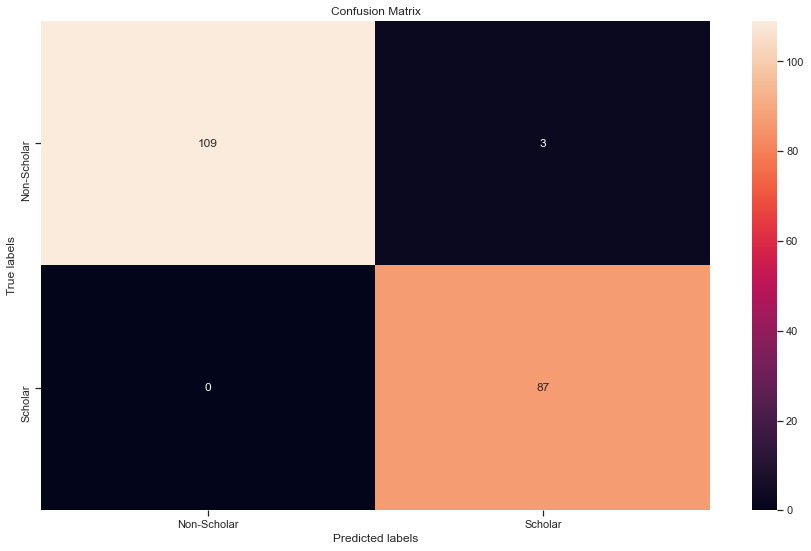

In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_1)
ax= plt.subplot()
sns.heatmap(cm,fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Scholar', 'Scholar']); ax.yaxis.set_ticklabels(['Non-Scholar', 'Scholar']);

### Naive Bayes

In [95]:
#Naive Bayes method
from sklearn.naive_bayes import GaussianNB

# creating a model
model_2 = GaussianNB()

# feeding the training data to the model
model_2.fit(x_train, y_train)

# predicting the test set results
y_pred_2 = model_2.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model_2.score(x_train, y_train))
print("Testing Accuracy :", model_2.score(x_test, y_test))

Training Accuracy : 0.6755050505050505
Testing Accuracy : 0.6331658291457286


### Confusion Matrix 
For `Naive Bayes`

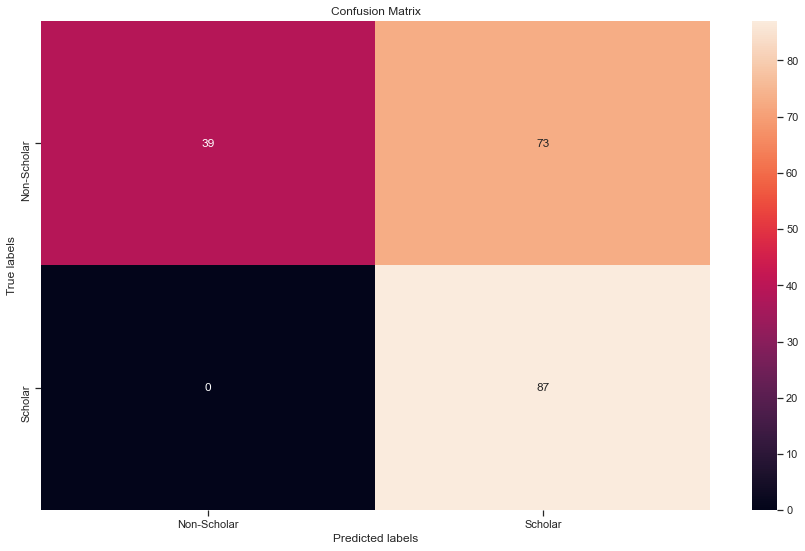

In [96]:
cm = confusion_matrix(y_test,y_pred_2)
ax= plt.subplot()
sns.heatmap(cm,fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Scholar', 'Scholar']); ax.yaxis.set_ticklabels(['Non-Scholar', 'Scholar']);

### Random Forest Classifier

In [97]:
#Random Forest Classifier Method
from sklearn.ensemble import RandomForestClassifier

# creating a model
model_3 = RandomForestClassifier(max_features=5, n_estimators=100)

# feeding the training data to the model
model_3.fit(x_train, y_train)

# predicting the x-test results
y_pred_3 = model_3.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model_3.score(x_train, y_train))
print("Testing Accuracy :", model_3.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


### Confusion Matrix 
For `Random Forest Classifier`

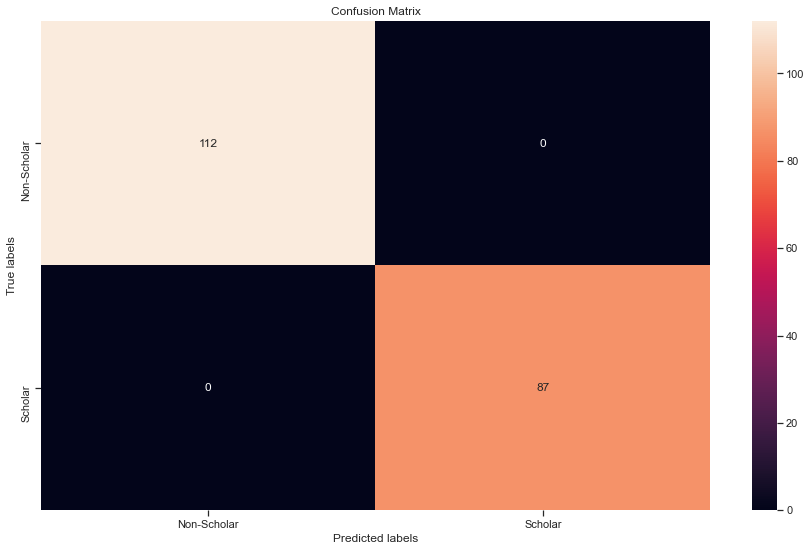

In [98]:
cm = confusion_matrix(y_test,y_pred_3)
ax= plt.subplot()
sns.heatmap(cm,fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Scholar', 'Scholar']); ax.yaxis.set_ticklabels(['Non-Scholar', 'Scholar']);

## Evaluation
 ### Cross Validation
 
 Perform Cross validation on all Training Models

In [99]:
#Evaluate by using the cross_validate
from sklearn.model_selection import cross_validate

print('Logistic Regression Algorithm')

kfold_result_1 = cross_validate(model_1, x_train, y_train, cv = 3, scoring = 'accuracy', return_train_score = True)

print('Cross Validate:\n',kfold_result_1,'\n')
print('Average training accuracy = {:.4f}'.format(kfold_result_1['train_score'].mean()))
print('Average validation accuracy = {:.4f}\n'.format(kfold_result_1['test_score'].mean()))

Logistic Regression Algorithm
Cross Validate:
 {'fit_time': array([0.01499081, 0.01392603, 0.01299906]), 'score_time': array([0.00196242, 0.00099826, 0.00196147]), 'test_score': array([0.99242424, 0.98484848, 0.98863636]), 'train_score': array([0.98674242, 0.9905303 , 0.98863636])} 

Average training accuracy = 0.9886
Average validation accuracy = 0.9886



In [100]:
print('Naive Bayes Algorithm')

kfold_result_2 = cross_validate(model_2, x_train, y_train, cv = 3, scoring = 'accuracy', return_train_score = True)

print('Cross Validate:\n',kfold_result_2,'\n')
print('Average training accuracy = {:.4f}'.format(kfold_result_2['train_score'].mean()))
print('Average validation accuracy = {:.4f}\n'.format(kfold_result_2['test_score'].mean()))

Naive Bayes Algorithm
Cross Validate:
 {'fit_time': array([0.00598407, 0.00498867, 0.00598621]), 'score_time': array([0.00398898, 0.00402045, 0.0019927 ]), 'test_score': array([0.67045455, 0.66666667, 0.69318182]), 'train_score': array([0.67613636, 0.66856061, 0.67613636])} 

Average training accuracy = 0.6736
Average validation accuracy = 0.6768



In [101]:
print('Random Forest Classifier Algorithm')

kfold_result_3 = cross_validate(model_3, x_train, y_train, cv = 3, scoring = 'accuracy', return_train_score = True)

print('Cross Validate:\n',kfold_result_3,'\n')
print('Average training accuracy = {:.4f}'.format(kfold_result_3['train_score'].mean()))
print('Average validation accuracy = {:.4f}\n'.format(kfold_result_3['test_score'].mean()))

Random Forest Classifier Algorithm
Cross Validate:
 {'fit_time': array([0.19651103, 0.19643378, 0.1994698 ]), 'score_time': array([0.01994467, 0.01599383, 0.01594973]), 'test_score': array([1., 1., 1.]), 'train_score': array([1., 1., 1.])} 

Average training accuracy = 1.0000
Average validation accuracy = 1.0000



## Fine Tuning

Using `Grid Search` 

In [102]:
#Hyperparameter Fine Tuning
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    }
}

In [103]:
#Look for Best scores and parameters
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
data = pd.DataFrame(scores,columns=['model','best_score','best_params'])
data

,model,best_score,best_params
0,random_forest,1.000000,{'n_estimators': 1}
1,logistic_regression,0.989899,{'C': 5}
2,naive_bayes_gaussian,0.676768,{}


<br>

## Testing

In [104]:
from sklearn.model_selection import cross_val_predict

y_cv_1 = cross_val_predict(model_1, x_train, y_train, cv = 3)
y_cv_2 = cross_val_predict(model_2, x_train, y_train, cv = 3)
y_cv_3 = cross_val_predict(model_3, x_train, y_train, cv = 3)

In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score #Obtain precision, recall and f1 score

print('Logistic Regression Method')
print('precision = {:.4f}'.format(precision_score(y_train, y_cv_1, average = 'macro')))
print('recall = {:.4f}'.format(recall_score (y_train, y_cv_1, average = 'macro')))
print('f1 score = {:.4f}\n'.format(f1_score(y_train, y_cv_1, average = 'macro')))

print('Naive Bayes Algorithm')
print('precision = {:.4f}'.format(precision_score(y_train, y_cv_2, average = 'macro')))
print('recall = {:.4f}'.format(recall_score (y_train, y_cv_2, average = 'macro')))
print('f1 score = {:.4f}\n'.format(f1_score(y_train, y_cv_2, average = 'macro')))

print('Random Forest Classifier Algorithm')
print('precision = {:.4f}'.format(precision_score(y_train, y_cv_3, average = 'macro')))
print('recall = {:.4f}'.format(recall_score (y_train, y_cv_3, average = 'macro')))
print('f1 score = {:.4f}\n'.format(f1_score(y_train, y_cv_3, average = 'macro')))


Logistic Regression Method
precision = 0.9876
recall = 0.9897
f1 score = 0.9885

Naive Bayes Algorithm
precision = 0.7902
recall = 0.7078
f1 score = 0.6608

Random Forest Classifier Algorithm
precision = 1.0000
recall = 1.0000
f1 score = 1.0000



In [106]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_t1 = model_1.predict(x_test) # fit on test set
print('Logistic Regression Method')
print('Test precision = {:.4f}'.format(precision_score(y_test, y_pred_t1, average = 'macro')))
print('Test recall = {:.4f}'.format(recall_score (y_test, y_pred_t1, average = 'macro')))
print('Test f1 score = {:.4f}\n'.format(f1_score(y_test, y_pred_t1, average = 'macro')))

y_pred_t2 = model_2.predict(x_test)
print('Naive Bayes Algorithm')
print('Test precision = {:.4f}'.format(precision_score(y_test, y_pred_t2, average = 'macro')))
print('Test recall = {:.4f}'.format(recall_score (y_test, y_pred_t2, average = 'macro')))
print('Test f1 score = {:.4f}\n'.format(f1_score(y_test, y_pred_t2, average = 'macro')))

y_pred_t3 = model_3.predict(x_test)
print('Random Forest Classifier Algorithm')
print('Test precision = {:.4f}'.format(precision_score(y_test, y_pred_t3, average = 'macro')))
print('Test recall = {:.4f}'.format(recall_score (y_test, y_pred_t3, average = 'macro')))
print('Test f1 score = {:.4f}\n'.format(f1_score(y_test, y_pred_t3, average = 'macro')))


Logistic Regression Method
Test precision = 0.9833
Test recall = 0.9866
Test f1 score = 0.9847

Naive Bayes Algorithm
Test precision = 0.7719
Test recall = 0.6741
Test f1 score = 0.6105

Random Forest Classifier Algorithm
Test precision = 1.0000
Test recall = 1.0000
Test f1 score = 1.0000



***
### Conclusion: 
<b>Random Forest algorithm </b> performs better classifications on this dataset compared to Logistic Regression and Naive Bayes.
***